**Atualizando a biblioteca para plotagem de gráficos**


**Importando bibliotecas**

In [323]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.preprocessing import LabelEncoder


**Abrindo um arquivo CSV do drive**

In [324]:
base_treino = pd.read_csv(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\dataset\train.csv')

In [325]:
base_treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Contando quantidade de instâncias**


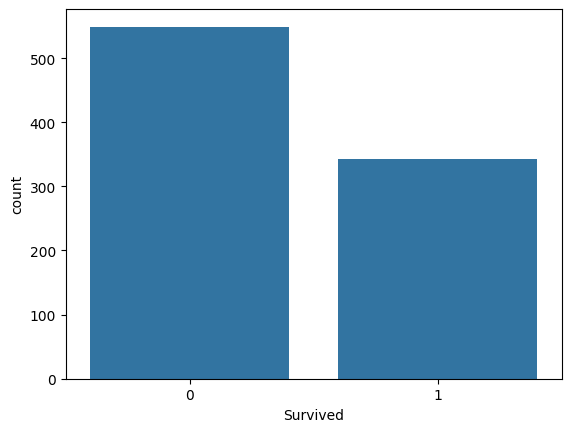

In [326]:
classificacao = base_treino.columns[1]
np.unique(base_treino[classificacao], return_counts=True)
sns.countplot(x = base_treino[classificacao]);

In [327]:
base_treino = base_treino.drop(columns=['Ticket', 'PassengerId', 'Cabin'])
base_treino.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [328]:
# Criar característica de tamanho da família
base_treino['FamilySize'] = base_treino['SibSp'] + base_treino['Parch'] + 1

base_treino.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [329]:
base_treino['Sex'] = base_treino['Sex'].map({'male': 0, 'female': 1})
base_treino['Embarked'] = base_treino['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [330]:
base_treino.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,1


In [331]:
base_treino['Title'] = base_treino.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
base_treino = base_treino.drop(columns='Name')


In [332]:
base_treino['Title'] = base_treino['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
base_treino['Title'] = base_treino['Title'].replace('Ms', 'Miss')
base_treino['Title'] = base_treino['Title'].replace('Mme', 'Mrs')
base_treino['Title'] = base_treino['Title'].replace('Mlle', 'Miss')

In [333]:
base_treino['Title'] = base_treino['Title'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Others': 4})

In [334]:
base_treino.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


In [335]:
corr_matrix = base_treino.corr()

<Axes: >

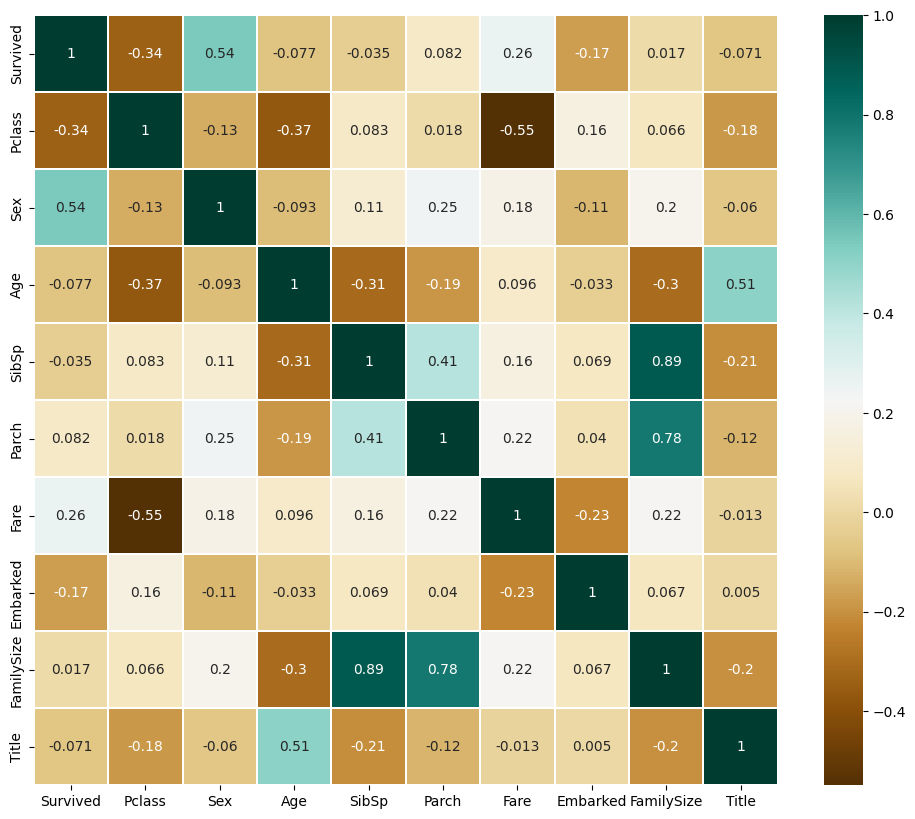

In [336]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(data = corr_matrix, cmap='BrBG', annot=True, linewidths=0.3)

In [337]:
base_treino.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
FamilySize      0
Title           0
dtype: int64


Apenas 2 valores nulos na coluna 'Embarked'. Vamos atribuir a classe com maior recorrencia a essas instancias.

In [338]:
base_treino['Embarked'] = base_treino['Embarked'].fillna(2)

In [339]:
corr_matrix = base_treino[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

<Axes: >

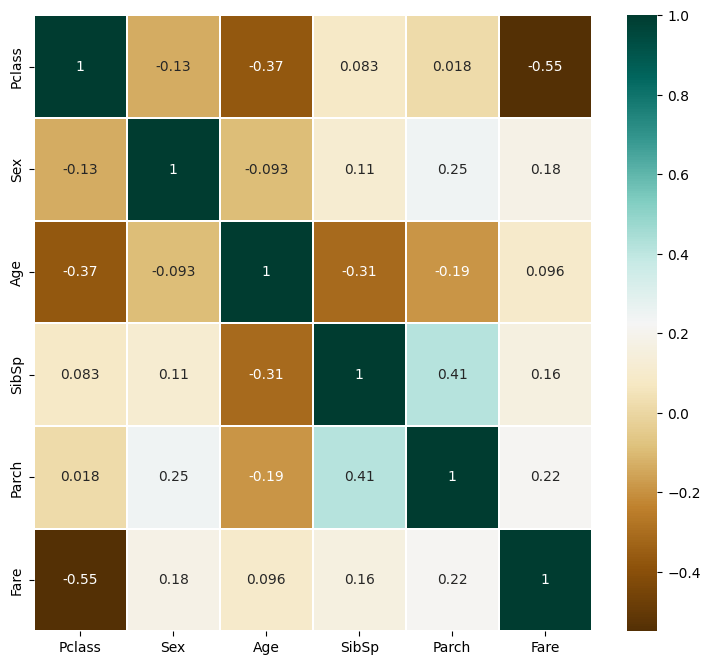

In [340]:
plt.figure(figsize=(9,8))
sns.heatmap(data=corr_matrix, cmap='BrBG', annot=True, linewidths=0.2)

In [341]:
nan_idx = base_treino['Age'][base_treino['Age'].isnull()].index

In [ ]:
for i in nan_idx:
    pred_age = base_treino['Age'][(
        (base_treino.SibSp == base_treino.iloc[i]["SibSp"]) &
        (base_treino.Parch == base_treino.iloc[i]["Parch"]) &
        (base_treino.Pclass == base_treino.iloc[i]["Pclass"]))].median()
    
    if not np.isnan(pred_age):
        base_treino['Age'].iloc[i] = pred_age
    else:
        base_treino['Age'].iloc[i] = base_treino['Age'].median()

In [390]:
base_treino.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64

In [391]:
base_treino.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


In [344]:
test_data = pd.read_csv(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\dataset\test.csv')

In [345]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [346]:
test_data = test_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])

In [347]:
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})
test_data['Embarked'] = test_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [348]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [349]:
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data = test_data.drop(columns='Name')

test_data['Title'] = test_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')

test_data['Title'] = test_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [350]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,3,0,34.5,0,0,7.8292,1,1,2.0
1,3,1,47.0,1,0,7.0000,2,2,3.0
2,2,0,62.0,0,0,9.6875,1,1,2.0
3,3,0,27.0,0,0,8.6625,2,1,2.0
4,3,1,22.0,1,1,12.2875,2,3,3.0


In [351]:
NaN_indexes = test_data['Age'][test_data['Age'].isnull()].index

for i in NaN_indexes:
    pred_age = test_data['Age'][((test_data.SibSp == test_data.iloc[i]["SibSp"]) &
                                   (test_data.Parch == test_data.iloc[i]["Parch"]) &
                                   (test_data.Pclass == base_treino.iloc[i]["Pclass"]))].median()
    if not np.isnan(pred_age):
        test_data['Age'].iloc[i] = pred_age
    else:
        test_data['Age'].iloc[i] = base_treino['Age'].median()

C:\Users\João\AppData\Local\Temp\ipykernel_11792\780479069.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_data['Age'].iloc[i] = pred_age
C:\Users\João\AppData\Local\Temp\ipykernel_11792\780479069.py:8: SettingWithCopyWarning: 
A va

In [352]:
title_mode = test_data.Title.mode()[0]
test_data.Title = test_data.Title.fillna(title_mode)

In [353]:
fare_mean = test_data.Fare.mean()
test_data.Fare = test_data.Fare.fillna(fare_mean)

In [354]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,3,0,34.5,0,0,7.8292,1,1,2.0
1,3,1,47.0,1,0,7.0000,2,2,3.0
2,2,0,62.0,0,0,9.6875,1,1,2.0
3,3,0,27.0,0,0,8.6625,2,1,2.0
4,3,1,22.0,1,1,12.2875,2,3,3.0


In [355]:
base_treino.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


In [375]:
from sklearn.utils import shuffle
train_data = shuffle(base_treino)

In [379]:
# training_data, valid_data = train_test_split(train_data, test_size=0.2, random_state=42)
X_train = train_data.drop(columns='Survived')
y_train = train_data.Survived
y_train = pd.DataFrame({'Survived':y_train.values})

In [380]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
410,3,0,26.00,0,0,7.8958,2.0,1,2
305,1,0,0.92,1,2,151.5500,2.0,4,0
239,2,0,33.00,0,0,12.2750,2.0,1,2
194,1,1,44.00,0,0,27.7208,0.0,1,3
242,2,0,29.00,0,0,10.5000,2.0,1,2
...,...,...,...,...,...,...,...,...,...
507,1,0,38.50,0,0,26.5500,2.0,1,2
571,1,1,53.00,2,0,51.4792,2.0,3,3
361,2,0,29.00,1,0,27.7208,0.0,2,2
160,3,0,44.00,0,1,16.1000,2.0,2,2


In [381]:
y_train

,Survived
0,0
1,1
2,0
3,1
4,0
...,...
886,1
887,1
888,0
889,0


In [382]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)


In [383]:
X_treino.shape

(712, 9)

In [392]:
X_teste

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
154,3,0,26.0,0,0,7.3125,2.0,1,2
510,3,0,29.0,0,0,7.7500,1.0,1,2
537,1,1,30.0,0,0,106.4250,0.0,1,1
612,3,1,25.0,1,0,15.5000,1.0,2,1
182,3,0,9.0,4,2,31.3875,2.0,7,0
...,...,...,...,...,...,...,...,...,...
487,1,0,58.0,0,0,29.7000,0.0,1,2
377,1,0,27.0,0,2,211.5000,0.0,3,2
526,2,1,50.0,0,0,10.5000,2.0,1,1
475,1,0,38.5,0,0,52.0000,2.0,1,2


In [387]:
y_teste

,Survived
709,0
439,1
840,1
720,1
39,0
...,...
433,0
773,0
25,1
84,0


In [357]:
# X_train = train_data.drop(columns='Survived')
# y_train = train_data.Survived
# y_train = pd.DataFrame({'Survived':y_train.values})

In [363]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

In [388]:
X_teste.to_csv('X_test.csv', index=False)
y_teste.to_csv('y_test.csv', index=False)


In [365]:
# from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [366]:
# cols_onehot_encode = ['Pclass', 'Sex']

# # Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
# onehot = OneHotEncoder(sparse_output=False, drop='first') # drop='first' evita multicolinearidade

# # Aplicar o OneHotEncoder apenas nas colunas categóricas
# df_onehot = onehot.fit_transform(base[cols_onehot_encode])

# # Obter os novos nomes das colunas após a codificação
# nomes_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# # Criar um DataFrame com os dados codificados e as novas colunas
# df_onehot = pd.DataFrame(df_onehot, columns=nomes_colunas)

In [367]:
# # Variáveis numéricas para normalização/padronização
# cols_numericas = ['Age', 'Fare', 'FamilySize']
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(base[cols_numericas])
# df_scaled = pd.DataFrame(df_scaled, columns=cols_numericas)

In [368]:
# colunas_a_manter = ['IsAlone']

# # Combinar as colunas codificadas com as colunas que não foram transformadas
# base_encoded= pd.concat([
#         df_onehot,
#         df_scaled,
#         base[colunas_a_manter],
#         base['Survived'] #target
#     ],
#     axis=1
# )

In [369]:
# colunas_a_remover = ['SibSp', 'Parch'] 
# base = base.drop(columns=colunas_a_remover)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [370]:
# # Supondo que a última coluna seja o target
# X_prev= base_encoded.iloc[:, :-1]
# y_classe = base_encoded.iloc[:, -1]

**Método de amostragem Holdout**

In [371]:
from sklearn.model_selection import train_test_split

In [372]:
y_classe.shape

(891,)

In [373]:
# #X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
# X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [374]:
import pickle
# with open(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\output\titanic.pkl', mode = 'wb') as f:
#   pickle.dump([X_treino, X_teste, y_treino, y_teste], f)